## Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# 1. Data cleaning
# 2. EDA
# 3. Model Selection
# 4. Model Deployment

## 1. Data cleaning

In [4]:
# here 1: patient is diabetic and 0: patient is non diabetic
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
531,0,107,76,0,0,45.3,0.686,24,0
310,6,80,66,30,0,26.2,0.313,41,0
242,3,139,54,0,0,25.6,0.402,22,1
633,1,128,82,17,183,27.5,0.115,22,0
755,1,128,88,39,110,36.5,1.057,37,1


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# here we came to know that there are no null values are present in a dataset

In [8]:
df.rename(columns={'Outcome':'target'},inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Statisticals measures of the  dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df["target"].value_counts()  # here we came to know that the dataset is not that much imbalanced

0    500
1    268
Name: target, dtype: int64

In [11]:
df.groupby("target").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
target,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## 2. EDA

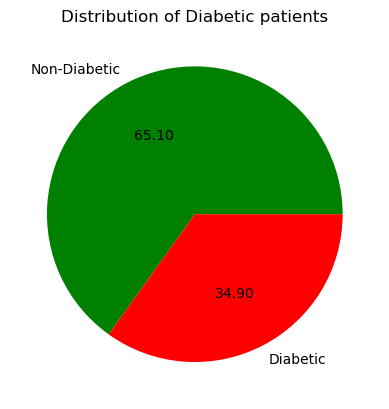

In [12]:
import matplotlib.pyplot as plt

target_counts = df['target'].value_counts()

colors = ['green', 'red']
plt.pie(target_counts, labels=['Non-Diabetic', 'Diabetic'], autopct="%0.2f", colors=colors)
plt.title('Distribution of Diabetic patients')
plt.show()

In [13]:
import seaborn as sns

<Axes: >

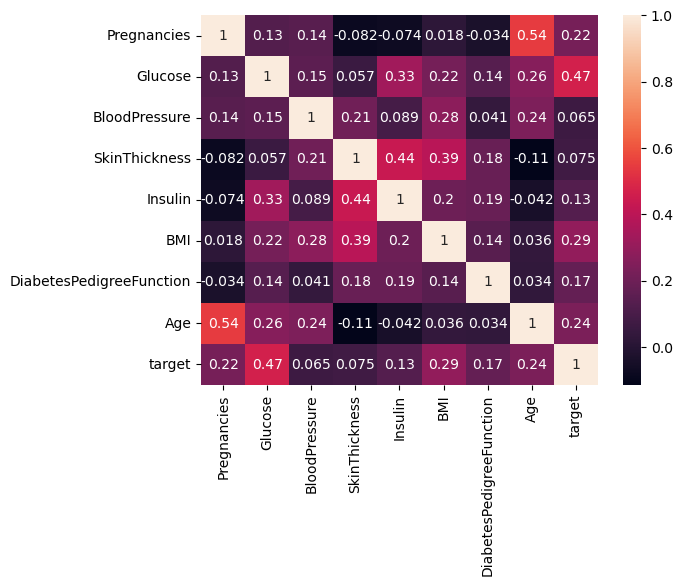

In [14]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Glucose', ylabel='Count'>

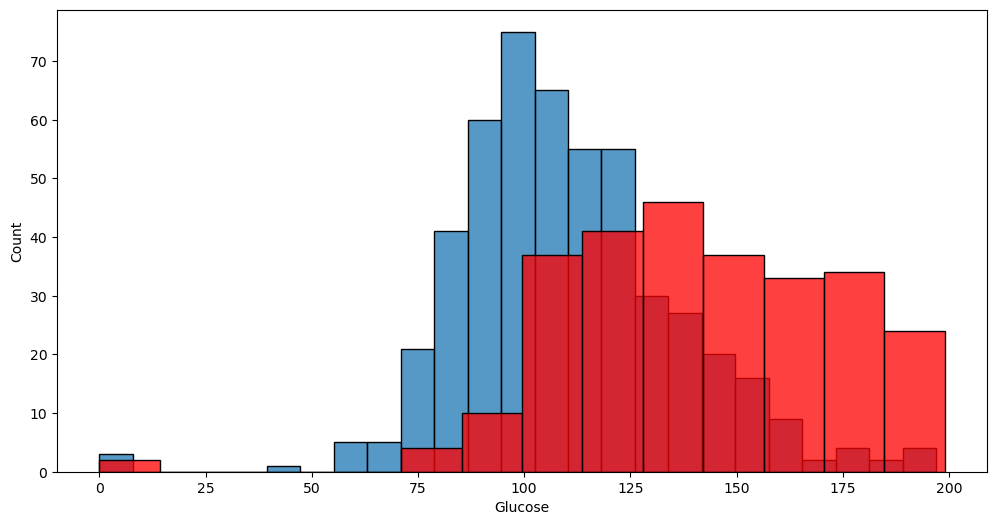

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['Glucose'])
sns.histplot(df[df['target'] == 1]['Glucose'],color='red')

<Axes: xlabel='Insulin', ylabel='Count'>

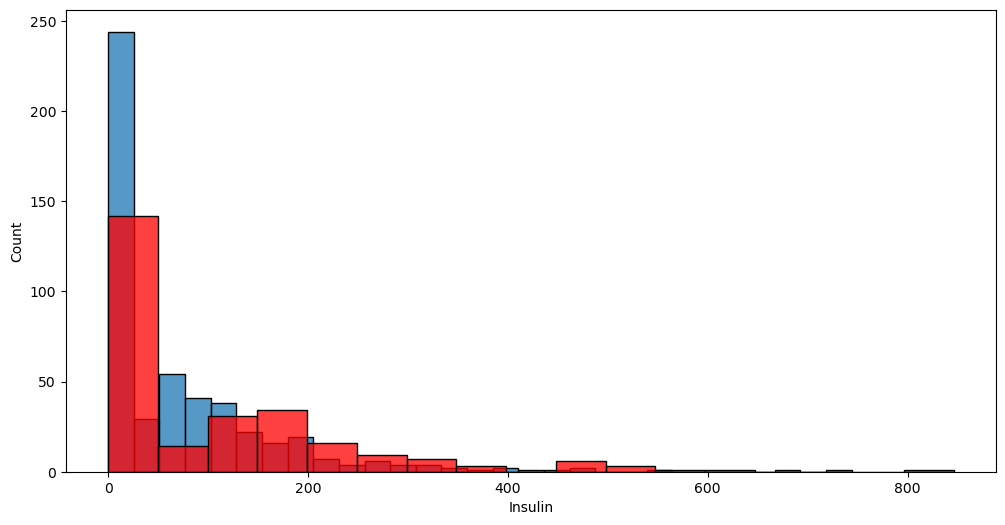

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['Insulin'])
sns.histplot(df[df['target'] == 1]['Insulin'],color='red')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

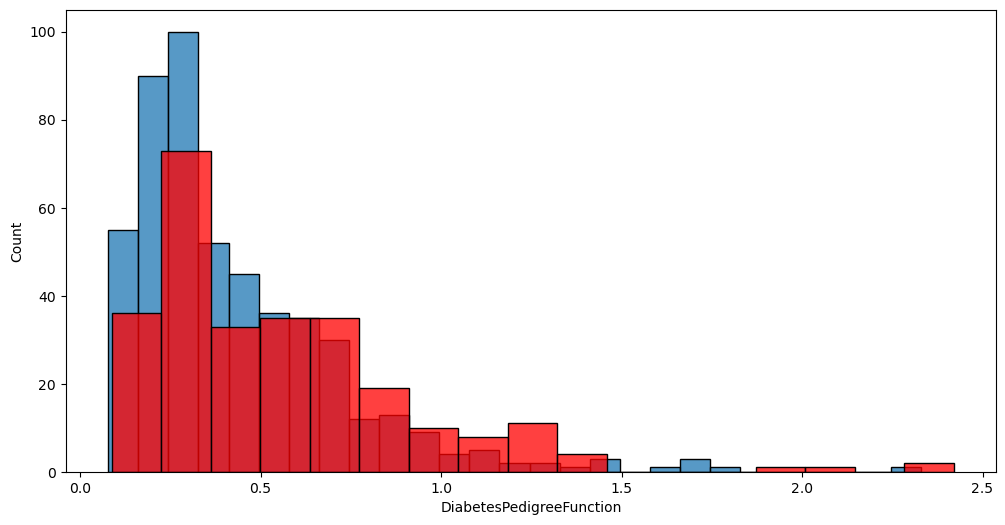

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['DiabetesPedigreeFunction'])
sns.histplot(df[df['target'] == 1]['DiabetesPedigreeFunction'],color='red')

<Axes: xlabel='Age', ylabel='Count'>

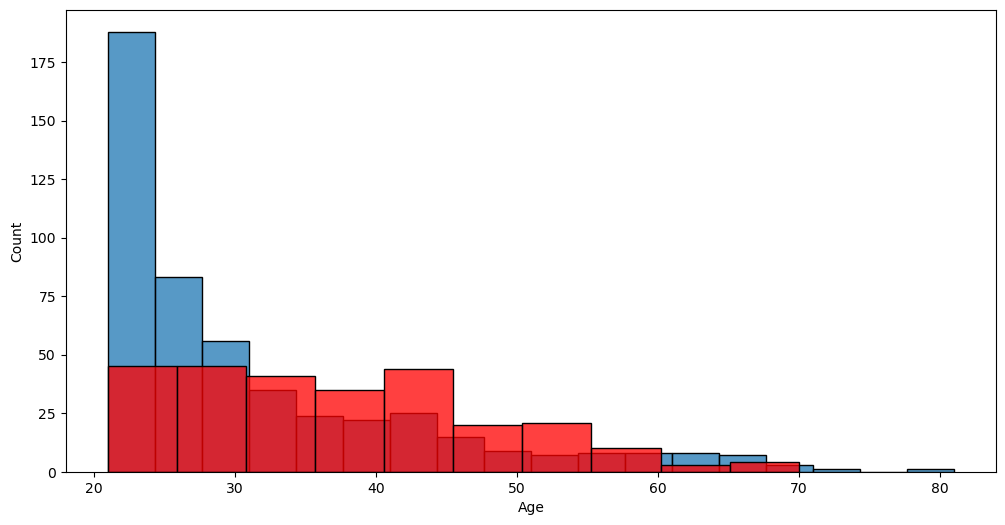

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['Age'])
sns.histplot(df[df['target'] == 1]['Age'],color='red')

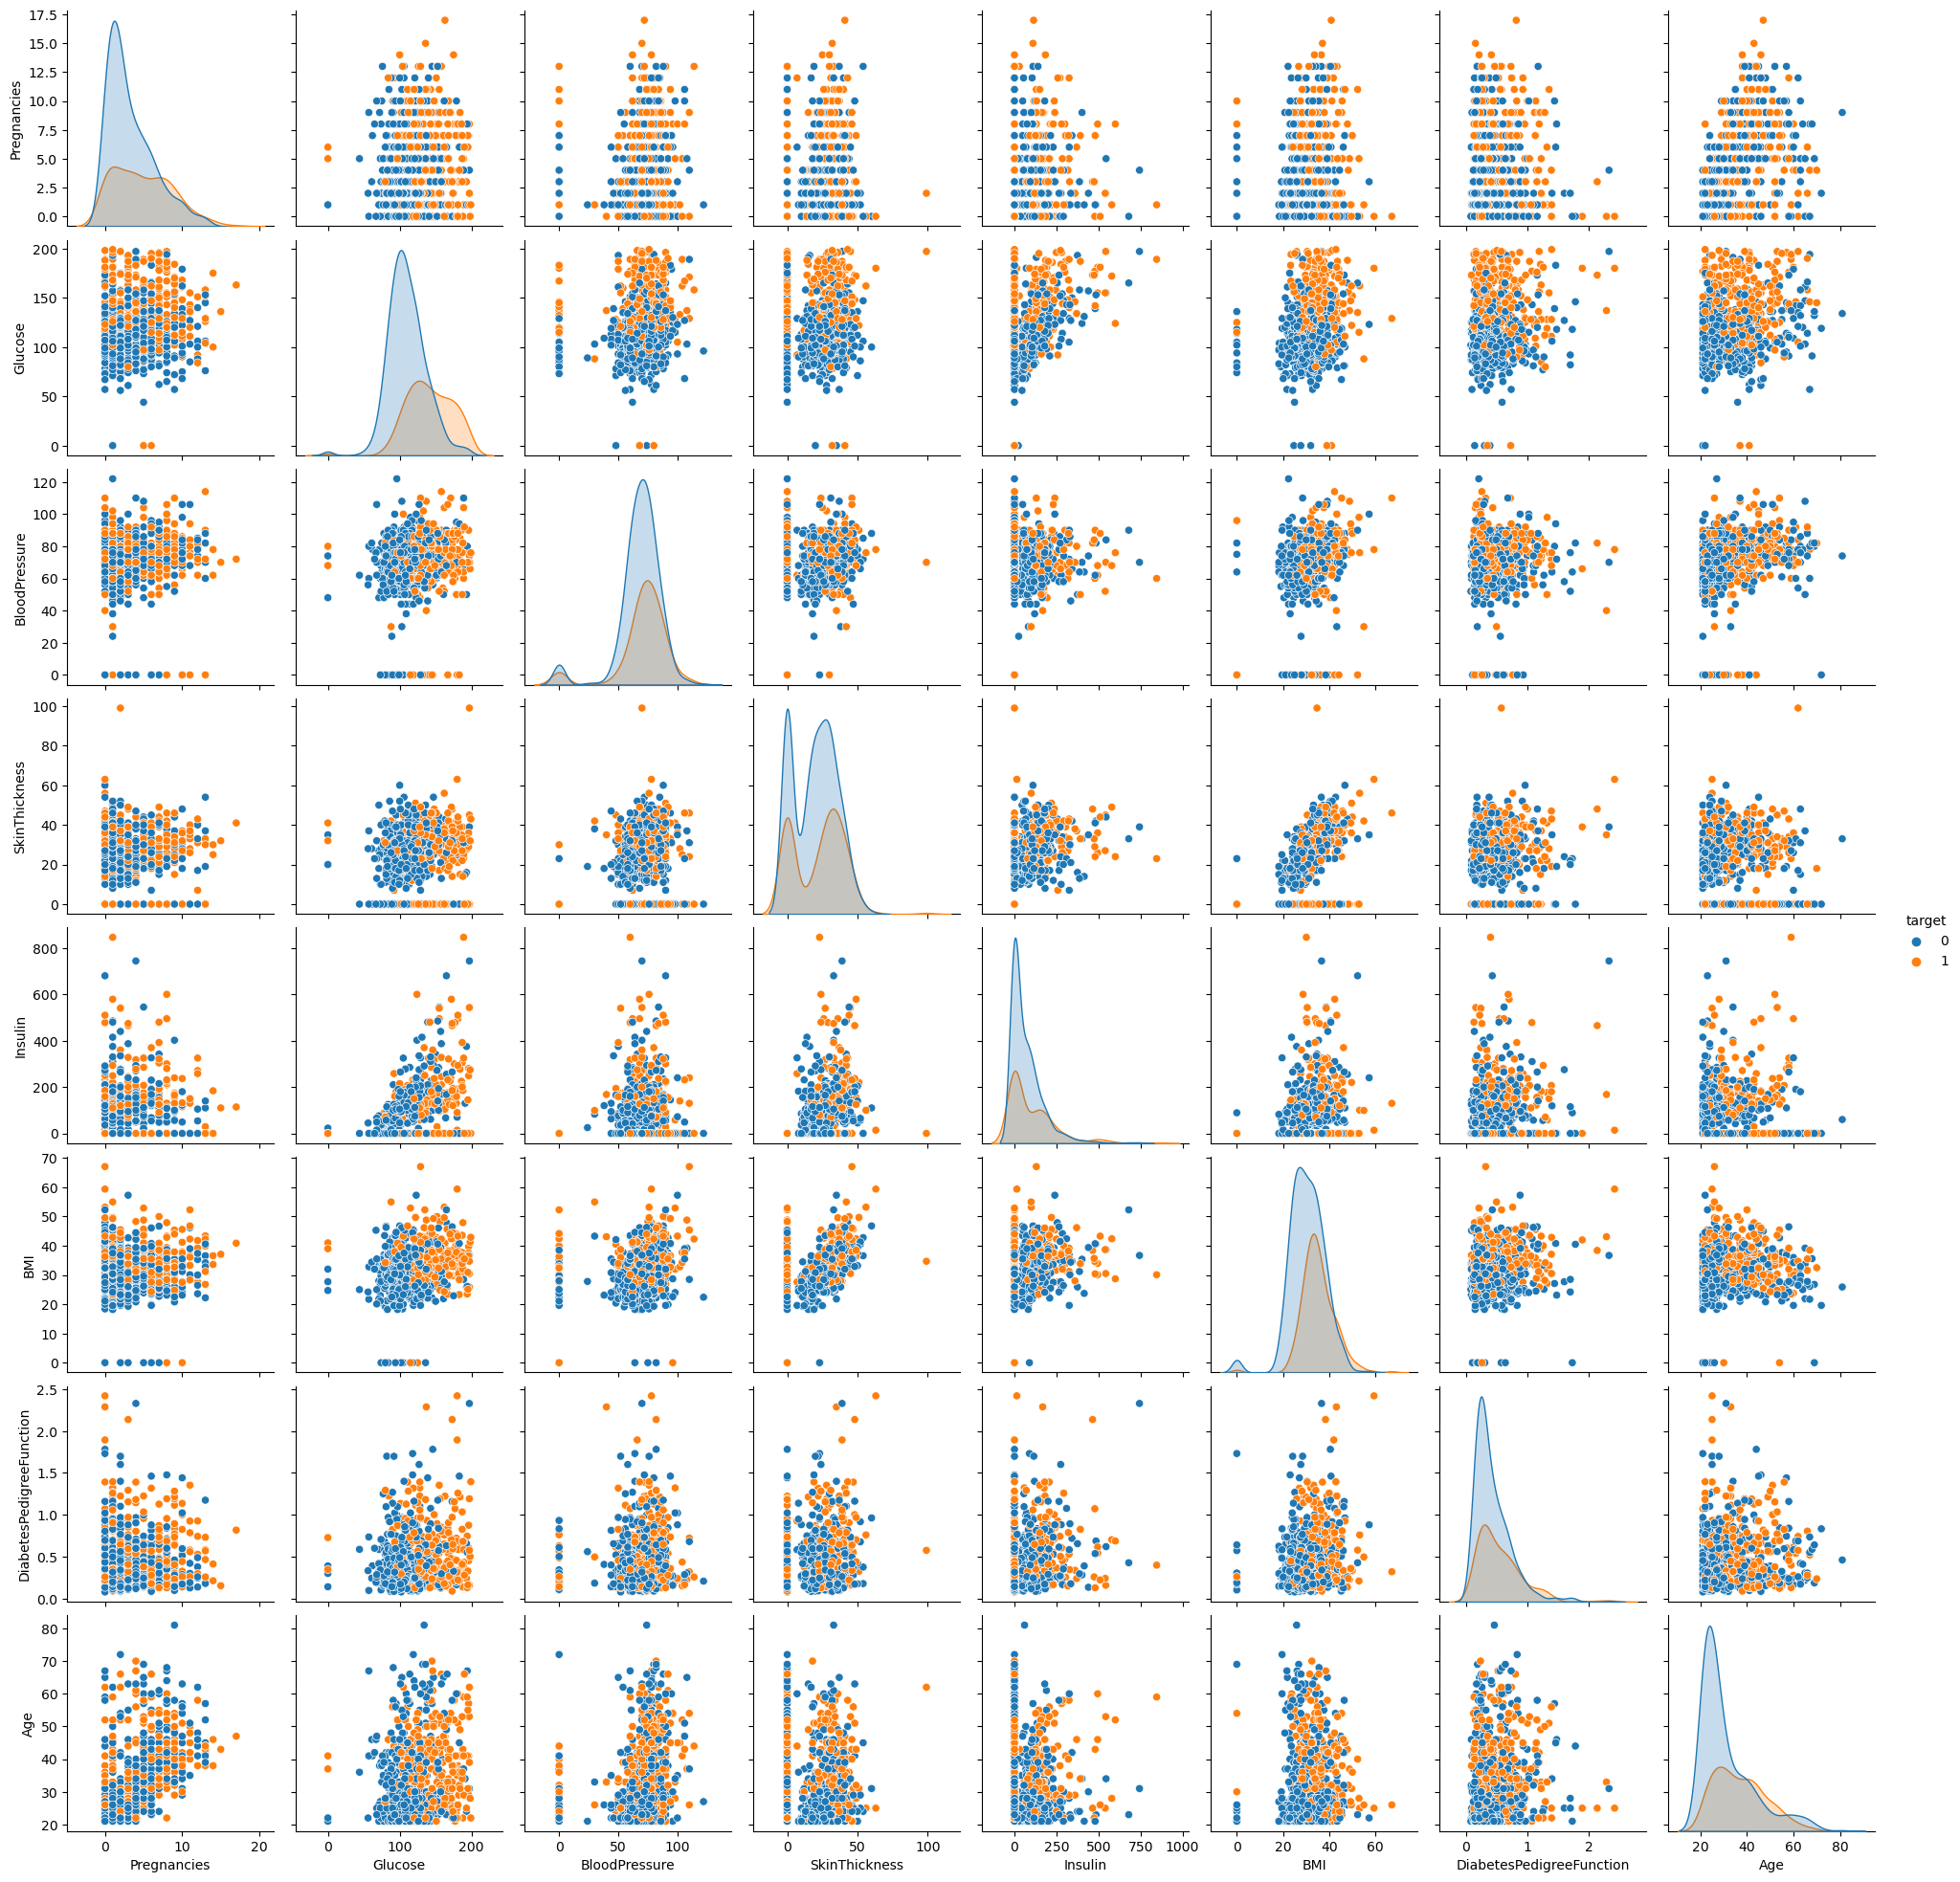

In [19]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing

In [41]:
X = df.drop("target", axis = 1)
y = df["target"]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify= y, random_state=2)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
svc_classifier = SVC(kernel='linear')
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Model Evaluation

In [47]:
#  for svc

In [48]:
svc_classifier = SVC(kernel='linear')

In [49]:
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
X_train_pred = svc_classifier.predict(X_train)
X_test_pred = svc_classifier.predict(X_test)

In [51]:
testing_data_accuracy = accuracy_score(X_test_pred,y_test)
training_data_accuracy = accuracy_score(X_train_pred,y_train)

In [52]:
print("Accuracy prediction on training data",training_data_accuracy)
print("Accuracy prediction on testing data",testing_data_accuracy)

Accuracy prediction on training data 0.7833876221498371
Accuracy prediction on testing data 0.7727272727272727


In [53]:
# for decision tree

In [54]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [56]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
X_train_pred = dt_classifier.predict(X_train)
X_test_pred = dt_classifier.predict(X_test)

In [59]:
training_data_accuracy = accuracy_score(X_train_pred,y_train)
testing_data_accuracy = accuracy_score(X_test_pred,y_test)

In [60]:
print("Accuracy prediction on training data",training_data_accuracy)
print("Accuracy prediction on testing data",testing_data_accuracy)

Accuracy prediction on training data 1.0
Accuracy prediction on testing data 0.7077922077922078


In [61]:
# for random forest

In [62]:
rf_classifier = RandomForestClassifier(random_state=42)

In [63]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
X_train_pred = rf_classifier.predict(X_train)
X_test_pred = rf_classifier.predict(X_test)

In [65]:
training_data_accuracy = accuracy_score(X_train_pred,y_train)
testing_data_accuracy = accuracy_score(X_test_pred,y_test)

In [66]:
print("Accuracy prediction on training data",training_data_accuracy)
print("Accuracy prediction on testing data",testing_data_accuracy)

Accuracy prediction on training data 1.0
Accuracy prediction on testing data 0.7532467532467533


# Here Support vector machine is doing good because it is more balanced. and for random forest the model is slightly going towards overfitting.

#  Thank You